# Klasyfikacja

## Golem Bootcamp - Mateusz Nawrocki


XI 2025

Na podstawie [Golem Bootcamp - Klasyfikacja - Filip Szympliński](https://github.com/KNSI-Golem/BootcampGeneral/blob/main/2024/meetings/2_klasyfikacja/klasyfikacja.ipynb)

## Importy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## SGD

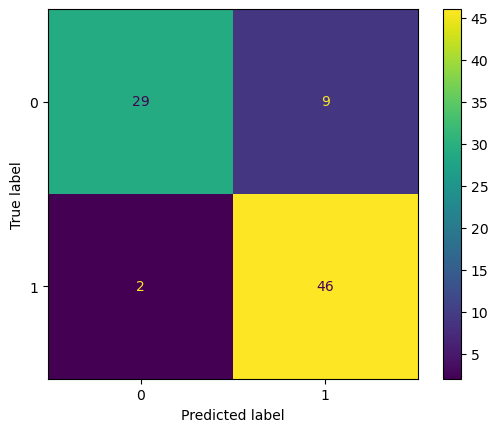

In [3]:
from sklearn.linear_model import SGDClassifier

# load the dataset
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12)

# test the classifier
clf = SGDClassifier(loss='log_loss', penalty='l2', random_state=12)

# train
clf.fit(X_train, y_train)

# test
y_pred = clf.predict(X_test)

# results
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## SVM

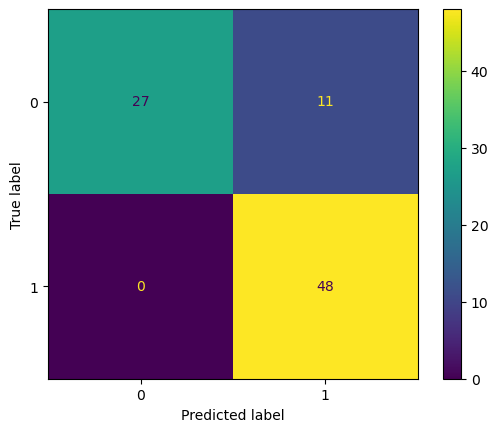

In [4]:
from sklearn.svm import SVC

# load the dataset
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12)

# test the classifier
clf = SVC()

# train
clf.fit(X_train, y_train)

# test
y_pred = clf.predict(X_test)

# results
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## K najbliższych sąsiadów

### Użycie

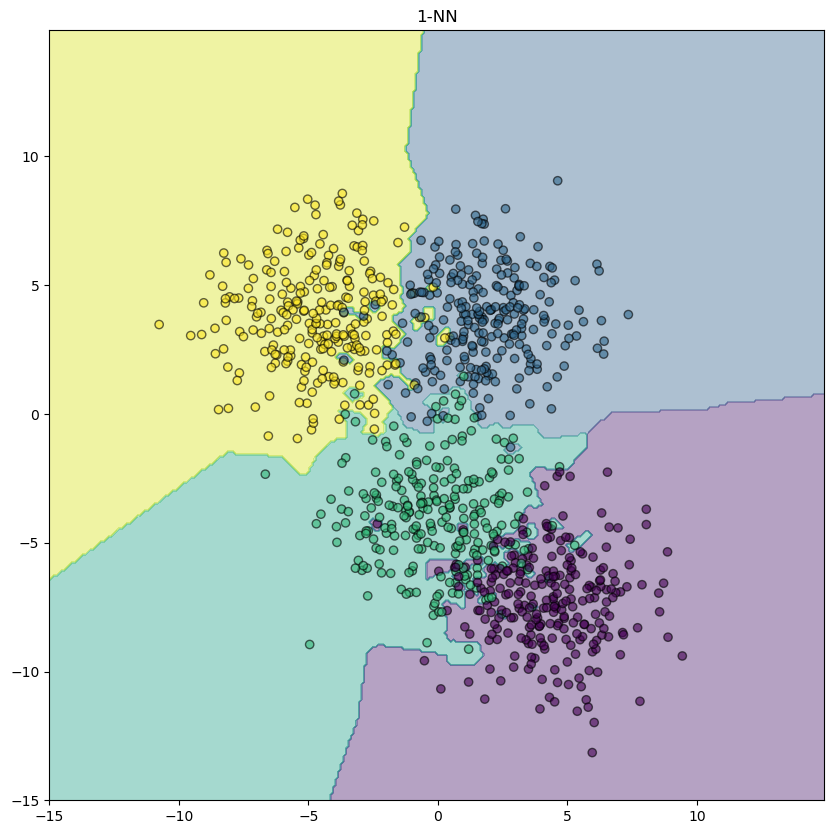

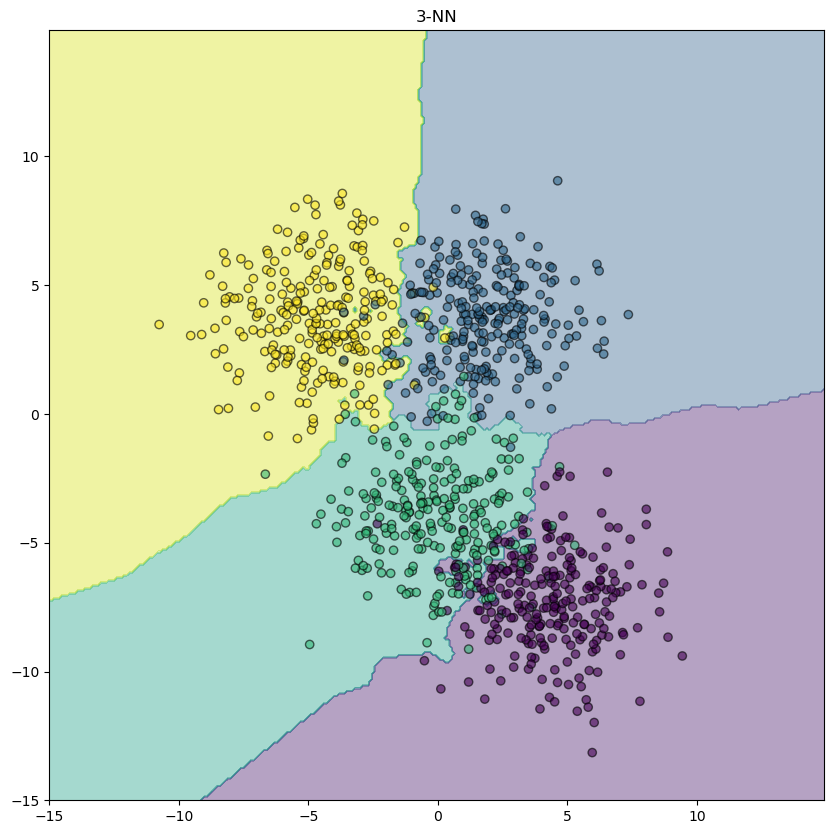

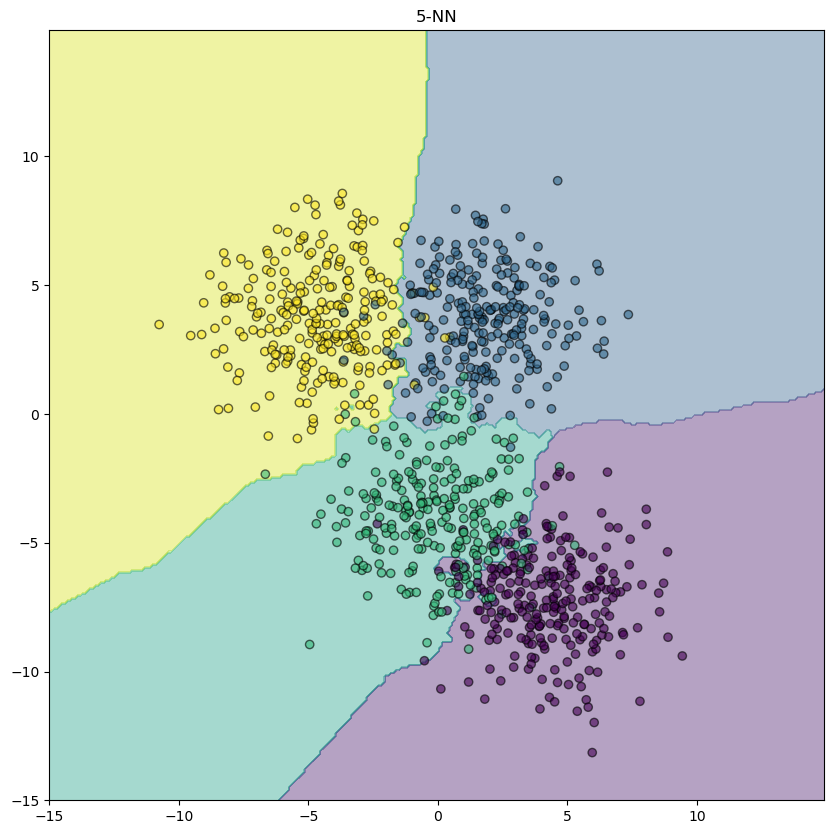

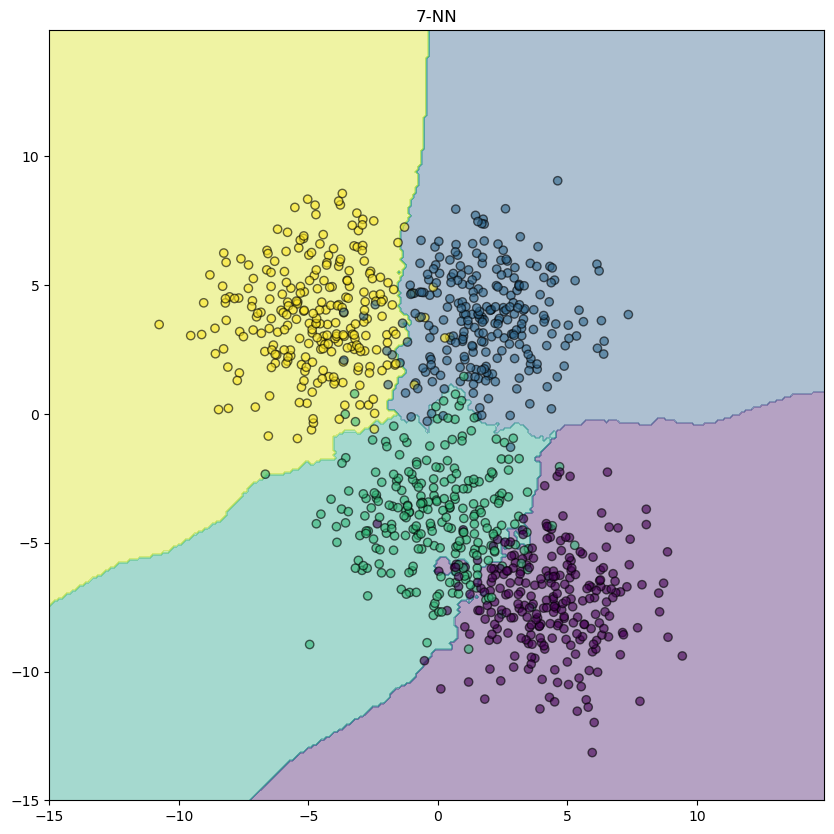

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# syntetyczny zbiór danych
X, y = datasets.make_blobs(n_samples=1000,
                  n_features=2,
                  centers=4,
                  cluster_std=2,
                  center_box=(-7.5, 7.5),
                  shuffle=True,
                  random_state=10)

for k in [1, 3, 5, 7]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)

    xx, yy = np.meshgrid(np.arange(-15, 15, 0.1),
                         np.arange(-15, 15, 0.1))

    # Create a plot with subplots
    fig, ax = plt.subplots(figsize=(10, 10))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', alpha=0.6)
    ax.set_title(f"{k}-NN")

    plt.show()

### Dobór K

(1000, 2)


Text(0, 0.5, 'Prawdopodobieństwo błędu')

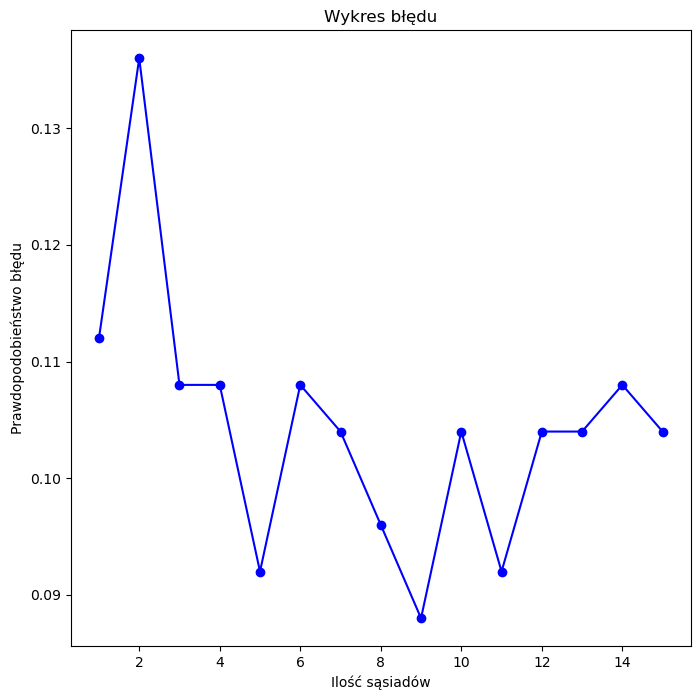

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
print(X.shape)

k_vals = range(1, 16)
results = np.zeros(15)
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    results[k-1] = 1 - model.score(X_test, y_test)

plt.figure(figsize=(8,8))
plt.plot(k_vals, results,'bo-')
plt.title('Wykres błędu')
plt.xlabel('Ilość sąsiadów')
plt.ylabel('Prawdopodobieństwo błędu')

### Walidacja

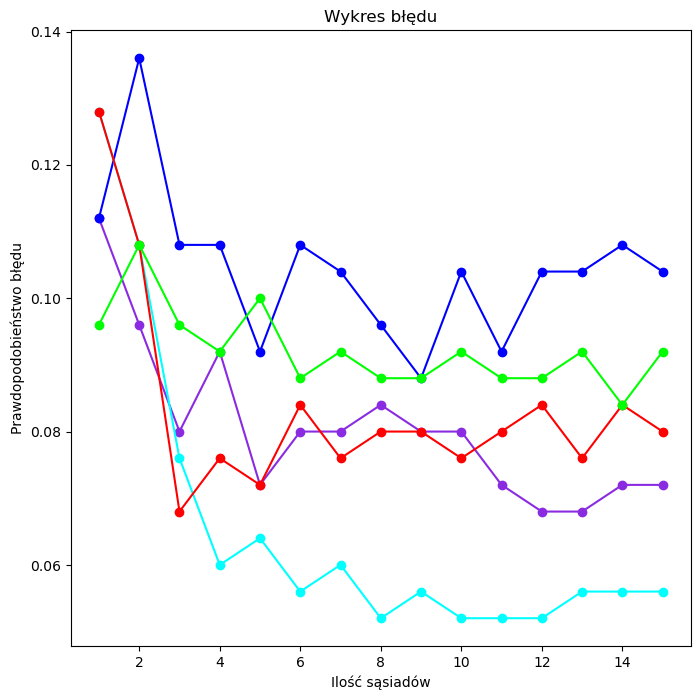

In [16]:
plt.figure(figsize=(8,8))
plt.title('Wykres błędu')
plt.xlabel('Ilość sąsiadów')
plt.ylabel('Prawdopodobieństwo błędu')

random_states=[7, 12, 67, 420, 1337]
colors = ["blueviolet", "blue", "cyan", "red", "lime"]

for random_state, color in zip(random_states, colors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    k_vals = range(1, 16)
    results = np.zeros(15)
    for k in k_vals:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train,y_train)
        results[k-1] = 1 - model.score(X_test, y_test)

    plt.plot(k_vals, results,'o-', color=color)

plt.show()

## Drzewa decyzyjne

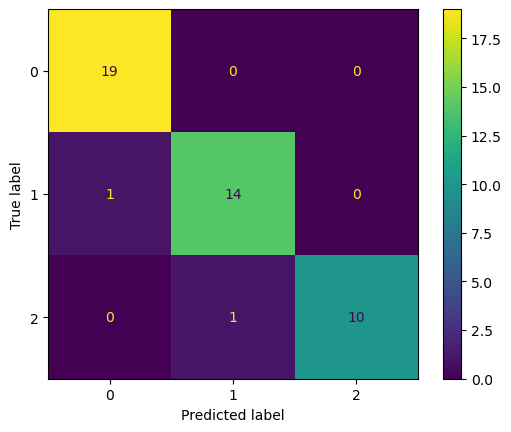

In [19]:
from sklearn.tree import DecisionTreeClassifier

# load the dataset
bc = datasets.load_wine()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# test the classifier
clf = DecisionTreeClassifier()

# train
clf.fit(X_train, y_train)

# test
y_pred = clf.predict(X_test)

# results
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## XGBoost

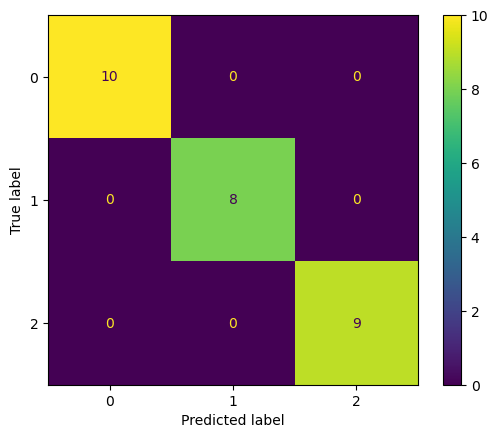

In [21]:
from numpy import loadtxt
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
bc = datasets.load_wine()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12)

# test the classifier
clf = XGBClassifier()
# train
clf.fit(X_train, y_train)
clf.get_booster().feature_names = bc.feature_names

# test
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

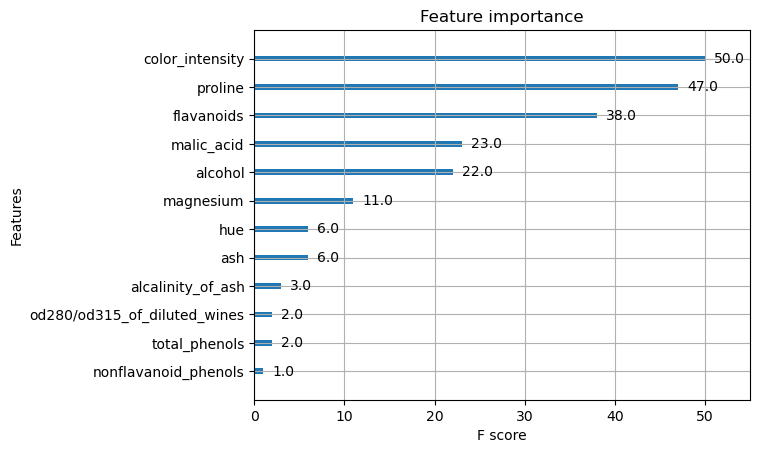

In [22]:
plot_importance(clf)